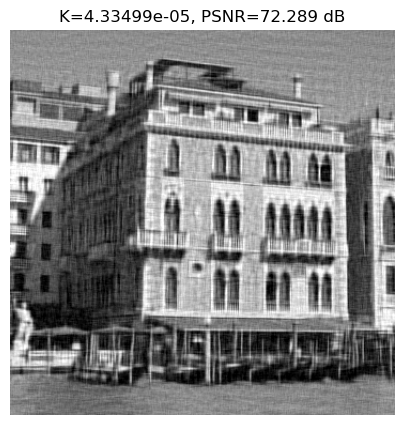

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from deconvolution import wiener_filtering, gaussian_kernel, compute_psnr

original = np.load("examples/original.npy")
noisy = np.load("examples/noisy.npy")
kernel = gaussian_kernel(size=15, sigma=5)

Ks1 = np.logspace(-12, -1, 60)
filtered1 = [wiener_filtering(noisy, kernel, K=float(k)) for k in Ks1]
psnrs1 = np.array([compute_psnr(img, original) for img in filtered1])
i1 = int(np.argmax(psnrs1))
l = Ks1[max(i1 - 1, 0)]
r = Ks1[min(i1 + 1, Ks1.size - 1)]
if l == r:
    l = l / 10.0
    r = r * 10.0

Ks2 = np.logspace(np.log10(l), np.log10(r), 80)
filtered2 = [wiener_filtering(noisy, kernel, K=float(k)) for k in Ks2]
psnrs2 = np.array([compute_psnr(img, original) for img in filtered2])
j2 = int(np.argmax(psnrs2))
best_K = float(Ks2[j2])
best_img = filtered2[j2]
best_psnr = float(psnrs2[j2])

plt.figure(figsize=(5, 5))
plt.imshow(best_img, cmap="gray", vmin=0, vmax=1)
plt.title(f"K={best_K:g}, PSNR={best_psnr:.3f} dB")
plt.axis("off")
plt.show()

In [5]:
best_K

4.334986714892133e-05